In [1]:
# Bienvenue sur mon Notebook Deeplearning. Please feel free to comment.

#This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-data-set/diabetes.csv


In [2]:
Diabete=pd.read_csv('../input/diabetes-data-set/diabetes.csv')

In [3]:
Diabete.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
Diabete.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Create target object and call it y
y = Diabete.Outcome
# Create X
features = ['Glucose','Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age']
X = Diabete[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Specify Model
diabete_model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[train_X.shape[1]]),
    layers.Dense(units=3, activation='relu'),
    layers.Dense(units=2, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1, activation='sigmoid'),
])

# Compile model
diabete_model.compile( optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'])

# Fit Model
diabete_model.fit(train_X, train_y)

# Make validation predictions and calculate mean absolute error
val_predictions = diabete_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)

#confusion_matrix(val_predictions, val_y)
print("Validation MAE :")
print(val_mae)

18/18 [==============================] - 0s 2ms/step - loss: 0.8295 - binary_accuracy: 0.5521
Validation MAE :
0.5033510763508579


In [6]:
#print(val_predictions)
#print(val_y)

Epoch 1/10
20/20 [==============================] - 1s 13ms/step - loss: 0.7528 - binary_accuracy: 0.5816 - val_loss: 0.7002 - val_binary_accuracy: 0.6250
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.7213 - binary_accuracy: 0.5903 - val_loss: 0.6934 - val_binary_accuracy: 0.6250
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.7073 - binary_accuracy: 0.6076 - val_loss: 0.6885 - val_binary_accuracy: 0.6302
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6968 - binary_accuracy: 0.6233 - val_loss: 0.6857 - val_binary_accuracy: 0.6302
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6916 - binary_accuracy: 0.6285 - val_loss: 0.6831 - val_binary_accuracy: 0.6250
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6871 - binary_accuracy: 0.6337 - val_loss: 0.6806 - val_binary_accuracy: 0.6250
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6

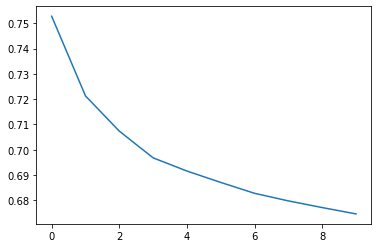

In [14]:
#optimizing the network

history = diabete_model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    batch_size=30,
    epochs=10,
)

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();


In [15]:
history_df.head()

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.752771,0.581597,0.700247,0.625000
1,0.721276,0.590278,0.693376,0.625000
2,0.707349,0.607639,0.688533,0.630208
3,0.696786,0.623264,0.685662,0.630208
4,0.691568,0.628472,0.683103,0.625000
